NOTE FOR INSTRUCTOR:
focus on histogram, pylab commands, plot a spectrum, comment on the spectrum

# Matplotlib and magic functions
Matplotlib is the most widely used scientific plotting package in Python.Import it by typing <font color='blue'>import matplotlib  </font> in your notebook. Use help to learn about the contents of a library module. You can import specific items from a library module to shorten programs. One can use <font color='blue'>from ... import ...   </font> to load only specific items from a library module. Then refer to them directly without
library name as prefix. jupyter Import library module pyplot in your notebook.
You can create an alias for a library module when importing it to shorten programs. One can use import ... as ... to create an alias.Create alias plt for library module pyplot in your
notebook.<br>
One can also use IPython magic function, but note it is only valid within the notebook envi- ronment. The % indicates an IPython magic function. You only have to execute this function once per notebook. For example if you’re using a Jupyter notebook, you’ll need to execute the command <font color='blue'>%matplotlib inline   </font> in order for your matplotlib images to appear in the notebook as cell output (inline) when show() is called. Normally you would put this at the very beginning of the notebook. Execute this command in your notebook.

In [1]:
# pylab is a nice interface to all that is matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Should plots pop up as you type? Use interactive on/off plt.ion() or plt.ioff()
plt.ion()

In [2]:
# if you want the plots to appear in the notebook
%matplotlib inline

# Basic Plotting

Basic components of the figure environment:

In [3]:
from IPython.display import Image
Image(url='http://matplotlib.org/_images/fig_map.png')

There are several ways to make a figure:
(for documentation type e.g, plt.figure?)

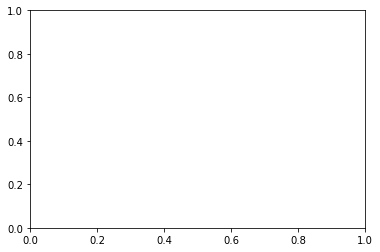

In [4]:
# basic
fig = plt.figure()
ax = plt.axes()
# plt.figure?
# plt.axes?

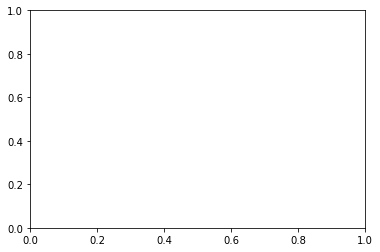

In [5]:
# my favorite:
fig, ax = plt.subplots()
# plt.subplots?
# fig, ax = plt.subplots(ncols=2)
# fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

In [6]:
# clear them:
plt.close()  # close the most recent window
plt.close('all')

In [7]:
# define something to plot
y = np.sin(np.linspace(0, 2*np.pi, 20))
x = np.arange(20)

## Line Plots

<code> '-'             solid line style
 '--'            dashed line style
 '-.'            dash-dot line style
 ':'             dotted line style
 'steps' | 'steps-pre' | 'steps-mid' | 'steps-post'
 </code>

Try these:

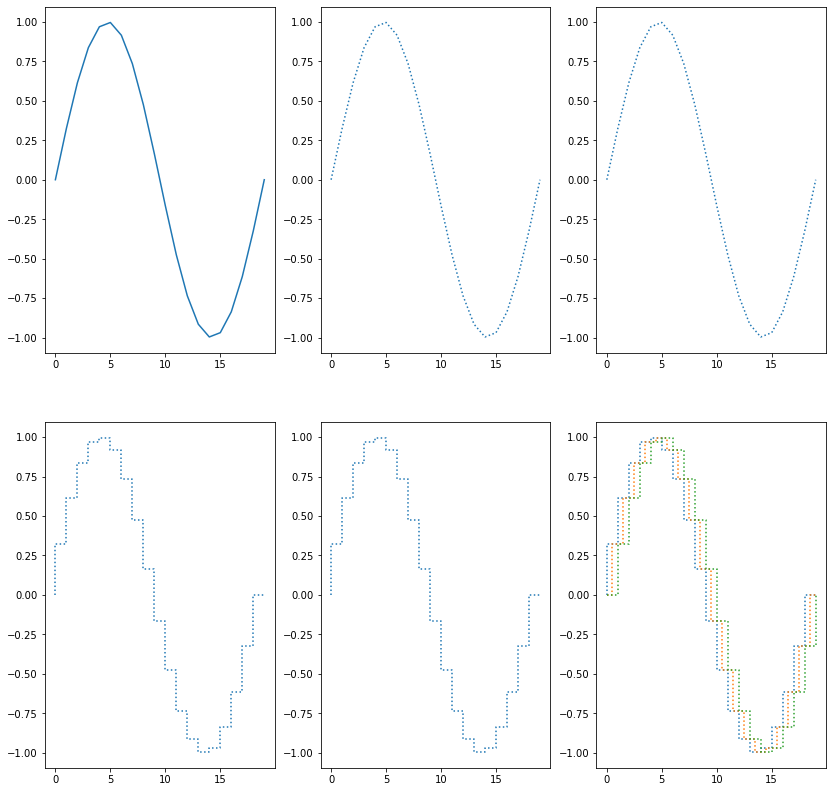

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(14, 14))
# plt.plot?
ax[0, 0].plot(x, y)
ax[0, 1].plot(x, y, ':')
ax[0, 2].plot(x, y, linestyle=':')
ax[1, 0].plot(x, y, linestyle=':', drawstyle ='steps')
ax[1, 1].plot(x, y, linestyle=':', drawstyle ='steps-pre')
ax[1, 2].plot(x, y, linestyle=':', drawstyle ='steps-pre')
ax[1, 2].plot(x, y, linestyle=':', drawstyle ='steps-mid')
ax[1, 2].plot(x, y, linestyle=':', drawstyle ='steps-post')

## Scatter plots using markers

<code> ``'.'``             point marker
 ``','``             pixel marker
 ``'o'``             circle marker
 ``'*'``             star marker
 ``'x'``             x marker
 ``'D'``             diamond marker
 ``'d'``             thin_diamond marker
</code>


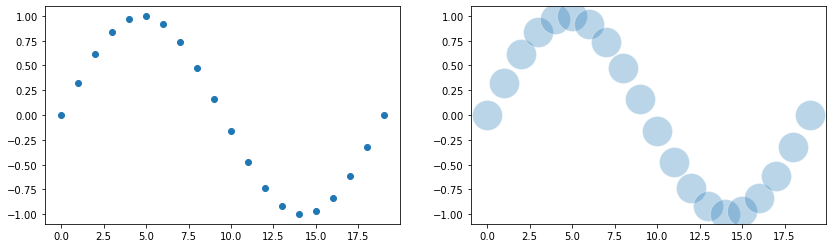

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 4))
ax[0].plot(x, y, 'o')
ax[1].plot(x, y, 'o', ms=30, mec='white', alpha=0.3)

## Scatter using plt.scatter

Scatter is useful because you can set the individual color or marker sizes as arrays.

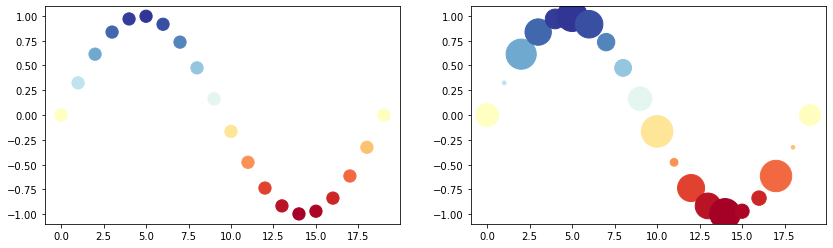

In [10]:
# A scatter plot that uses colors picked by the y value (you must set the color map)
fig, ax = plt.subplots(ncols=2, figsize=(14,4))

ax[0].scatter(x, y, c=y, cmap=plt.cm.RdYlBu, s=150)

# Same as above, with the marker size set by the array z
z = np.random.random(20) * 1000
ax[1].scatter(x, y, c=y, cmap=plt.cm.RdYlBu, s=z)

## Error Bars

<ErrorbarContainer object of 3 artists>

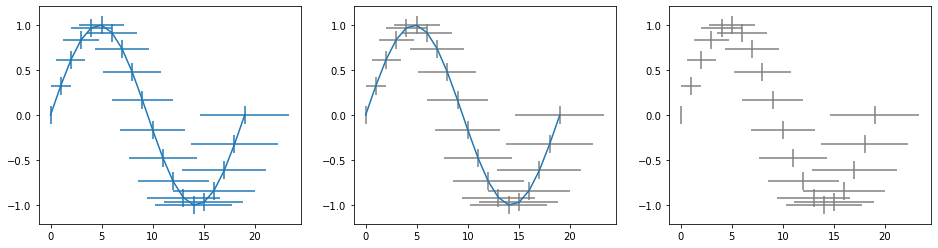

In [11]:
xerr = np.sqrt(x)
yerr = 0.1
fig, ax = plt.subplots(ncols=3, figsize=(16, 4))
ax[0].errorbar(x, y, xerr=xerr, yerr=yerr)
# no error caps, color the error bars differently than the data:
ax[1].errorbar(x, y, xerr=xerr, yerr=yerr, capsize=0, ecolor='gray')
# don't plot values? Just error bars? set fmt='none'
ax[2].errorbar(x, y, xerr=xerr, yerr=yerr, capsize=0, ecolor='gray', fmt='none')

## Histograms

Matplotlib has a plt.hist function that can create histograms and plot them.

Let's define what is an histogram. In physics severla times we take a set of measurments. 
Let's consider some random measurment and plot them as a function of the number of the measurment

Text(0, 0.5, 'value')

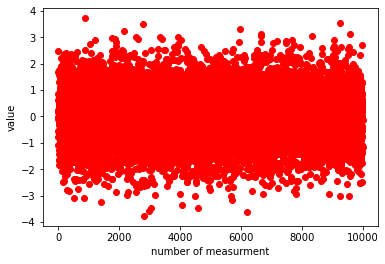

In [12]:
x = np.random.normal(size=10000)
number = np.arange(len(x))
plt.plot(number,x,'or')
plt.xlabel('number of measurment')
plt.ylabel('value')

this is hard to see so let's devide the range of values in intervals

Text(0, 0.5, 'value')

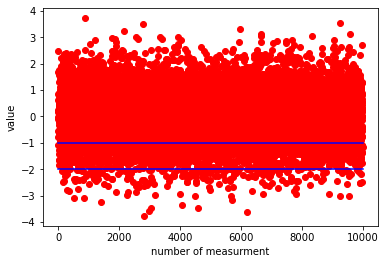

In [13]:
plt.plot(number,x,'or')
plt.plot([0,10000],[-1,-1],'-b')
plt.plot([0,10000],[-2,-2],'-b')
plt.xlabel('number of measurment')
plt.ylabel('value')

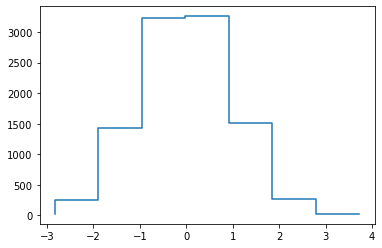

In [14]:
fig, ax = plt.subplots()
h, bins = np.histogram(x, bins=8)
ax.plot(bins[1:], h,  linestyle='-', drawstyle ='steps-pre')
plt.draw()
#fig, ax = plt.subplots(ncols=1, figsize=(6, 6))
#h, bins, p = ax[0].hist(x, bins=20)

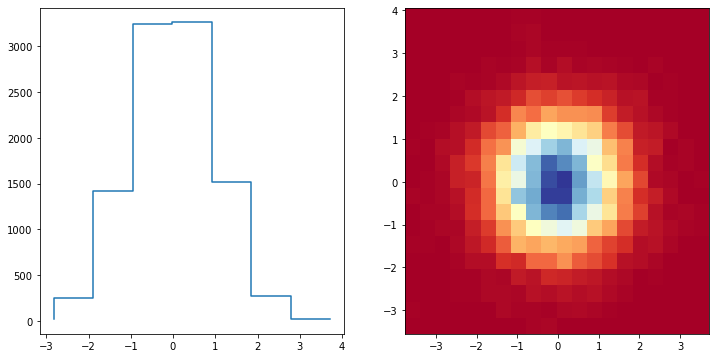

In [15]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
y = np.random.normal(size=10000)
h, bins = np.histogram(x, bins=8)
ax[0].plot(bins[1:], h,  linestyle='-', drawstyle ='steps-pre')
h, xe, ye, p = ax[1].hist2d(x, y, bins=20, cmap=plt.cm.RdYlBu)

# Plotting with Data

In [16]:
data = np.genfromtxt('solar_spectrum_3.txt')
# the data format is an array of arrays. each element of the array is a
# 2 dimensions array with one wavelength and one flux value.
# [[wave1  flux1], [wave2, flux2] .....]
print(data[0:3])

[[2.8000e+02 2.5361e-26]
 [2.8050e+02 1.0917e-24]
 [2.8100e+02 6.1253e-24]]


let's split data in 2 arrays (one for wavelength and one for flux) 
zip(xx,yy) is an aweasome command to combine two arrays 
zip(*xxx) do the opposite of zip, splits data in 2 arrays 
(..... I wish someone would have told me about zip when i started to learn python ....)

In [17]:
# xx, yy will be the two columns in the file
xx,yy = zip(*data)
print(xx)

(280.0, 280.5, 281.0, 281.5, 282.0, 282.5, 283.0, 283.5, 284.0, 284.5, 285.0, 285.5, 286.0, 286.5, 287.0, 287.5, 288.0, 288.5, 289.0, 289.5, 290.0, 290.5, 291.0, 291.5, 292.0, 292.5, 293.0, 293.5, 294.0, 294.5, 295.0, 295.5, 296.0, 296.5, 297.0, 297.5, 298.0, 298.5, 299.0, 299.5, 300.0, 300.5, 301.0, 301.5, 302.0, 302.5, 303.0, 303.5, 304.0, 304.5, 305.0, 305.5, 306.0, 306.5, 307.0, 307.5, 308.0, 308.5, 309.0, 309.5, 310.0, 310.5, 311.0, 311.5, 312.0, 312.5, 313.0, 313.5, 314.0, 314.5, 315.0, 315.5, 316.0, 316.5, 317.0, 317.5, 318.0, 318.5, 319.0, 319.5, 320.0, 320.5, 321.0, 321.5, 322.0, 322.5, 323.0, 323.5, 324.0, 324.5, 325.0, 325.5, 326.0, 326.5, 327.0, 327.5, 328.0, 328.5, 329.0, 329.5, 330.0, 330.5, 331.0, 331.5, 332.0, 332.5, 333.0, 333.5, 334.0, 334.5, 335.0, 335.5, 336.0, 336.5, 337.0, 337.5, 338.0, 338.5, 339.0, 339.5, 340.0, 340.5, 341.0, 341.5, 342.0, 342.5, 343.0, 343.5, 344.0, 344.5, 345.0, 345.5, 346.0, 346.5, 347.0, 347.5, 348.0, 348.5, 349.0, 349.5, 350.0, 350.5, 351.0

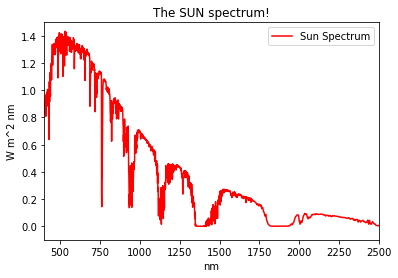

In [18]:
plt.plot( xx, yy, '-',color='r', label='Sun Spectrum')
# add label in x axis
plt.xlabel('nm')
# add label in y axis
plt.ylabel('W m^2 nm')
plt.title('The SUN spectrum!')
plt.xlim(400,2500)
plt.ylim(-.1,1.5)
plt.legend(loc=1,ncol=1,numpoints=1)

## Matplotlib plotting Gallaries

+ http://matplotlib.org/gallery.html
+ http://www.labri.fr/perso/nrougier/coding/gallery/
+ http://www.astroml.org/examples/index.html